### Import Dataset
- Reads the dataset `game_statistics.csv` into a pandas DataFrame for analysis.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#CONSTS
READ_FOLDER_PATH = '../data/processed/'
WRITE_FOLDER_PATH = '../data/processed/'

data = pd.read_csv(READ_FOLDER_PATH+'game_statistics.csv')

print(data.shape[0])

941009


### Define Colours for Visualisations
Defines custom colour codes for use in plots:

In [3]:
COLOUR_WIN = '#00A807'
COLOUR_LOSE = '#F65348'
COLOUR_DRAW = 'lightsteelblue'
COLOUR_AXIS2 = 'darkslateblue'

### Plot Corner Frequencies Over Time
This function visualises the frequency of corners over the course of a game using time bins.

  - Filters only corner events (`event_type == 2`).
  - Creates time bins of equal intervals (e.g., 5, or 10 minutes)
  - Generates a bar chart showing the frequency of corners in each time bin (with frequency)

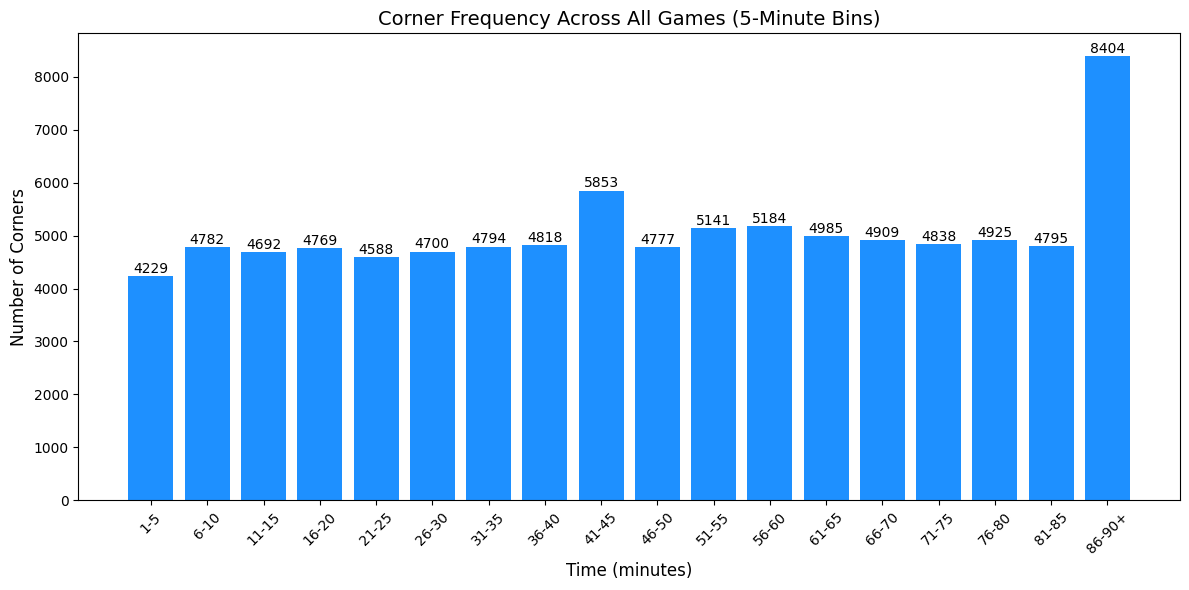

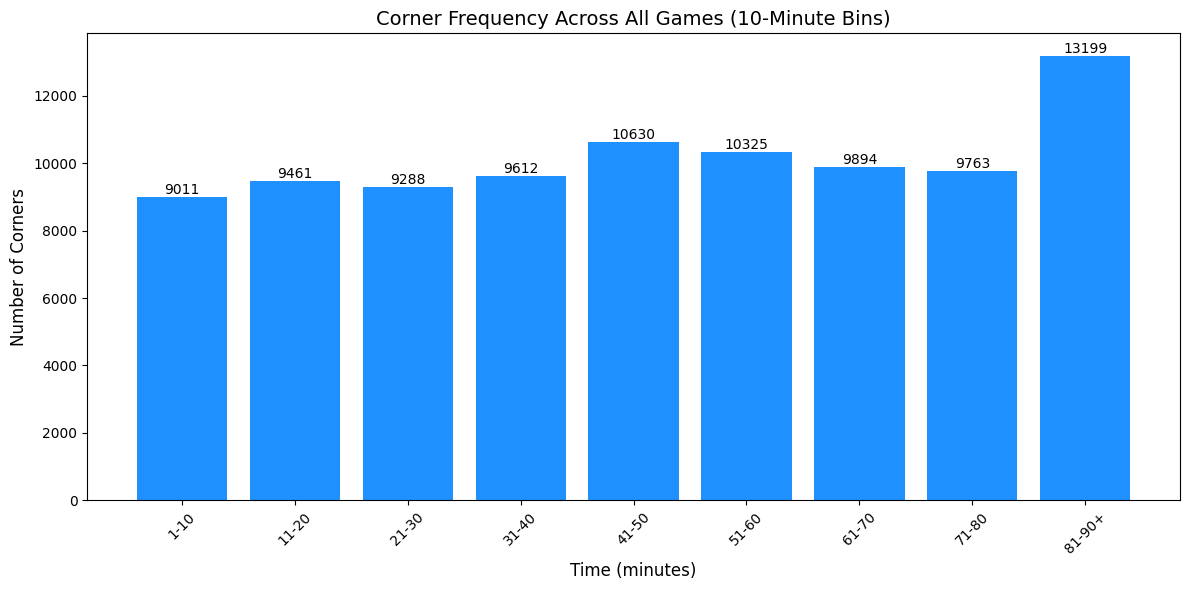

In [10]:
def plot_corner_frequencies_corrected(data, bin_size):
    #Filter for corner events
    corner_data = data[data['event_type'] == 2]

    #remove invalid or missing values
    corner_data = corner_data[corner_data['time'].notnull()]
    corner_data = corner_data[corner_data['time'] >= 0]  #nsure time values are valid

    #Define bins based on the bin size 
    bins = list(range(1, 91, bin_size)) + [float('inf')]  # 90+ as part of the last bin
    labels = [f"{bins[i]}-{bins[i+1]-1}" if bins[i+1] != float('inf') else f"{bins[i]}-90+" for i in range(len(bins)-1)] 
    #create a new column for time bins
    corner_data['time_bin'] = pd.cut(corner_data['time'], bins=bins,labels=labels, right=False) 

    #Count num of corners in each time bin... 
    corner_counts = corner_data['time_bin'].value_counts(sort=False)  
    

    #Plot graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(corner_counts.index.astype(str), corner_counts.values, width=0.8, color='dodgerblue')
    plt.title(f'Corner Frequency Across All Games ({bin_size}-Minute Bins)',fontsize=14)
    plt.xlabel('Time (minutes)',fontsize=12)
    plt.ylabel('Number of Corners',fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()


    # Add frequency labels on top of each bar:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() /2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', va='bottom', fontsize=10)

 
    plt.show()

# Example usage for 5-minute and 10-minute bins with the corrected function
plot_corner_frequencies_corrected(data,5)
plot_corner_frequencies_corrected(data,10)